# Taller 2

## Ejercicio 1

### 2. Filtro Finite Impulse Response

#### Importar liberias

In [1]:
from scipy.io import wavfile as waves
from IPython.display import Audio
import scipy.fftpack as fourier
import pyaudio as pa
import numpy as np
import matplotlib.pyplot as plt

##### 2.1. FIR Pasa Alto Window = Hamming

###### Filtro digital sin retroalimentación que deja pasar solo las frecuencias altas y atenúa las bajas, cuyos coeficientes se obtienen aplicando la ventana de Hamming para suavizar la transición y reducir los efectos indeseados en la respuesta en frecuencia

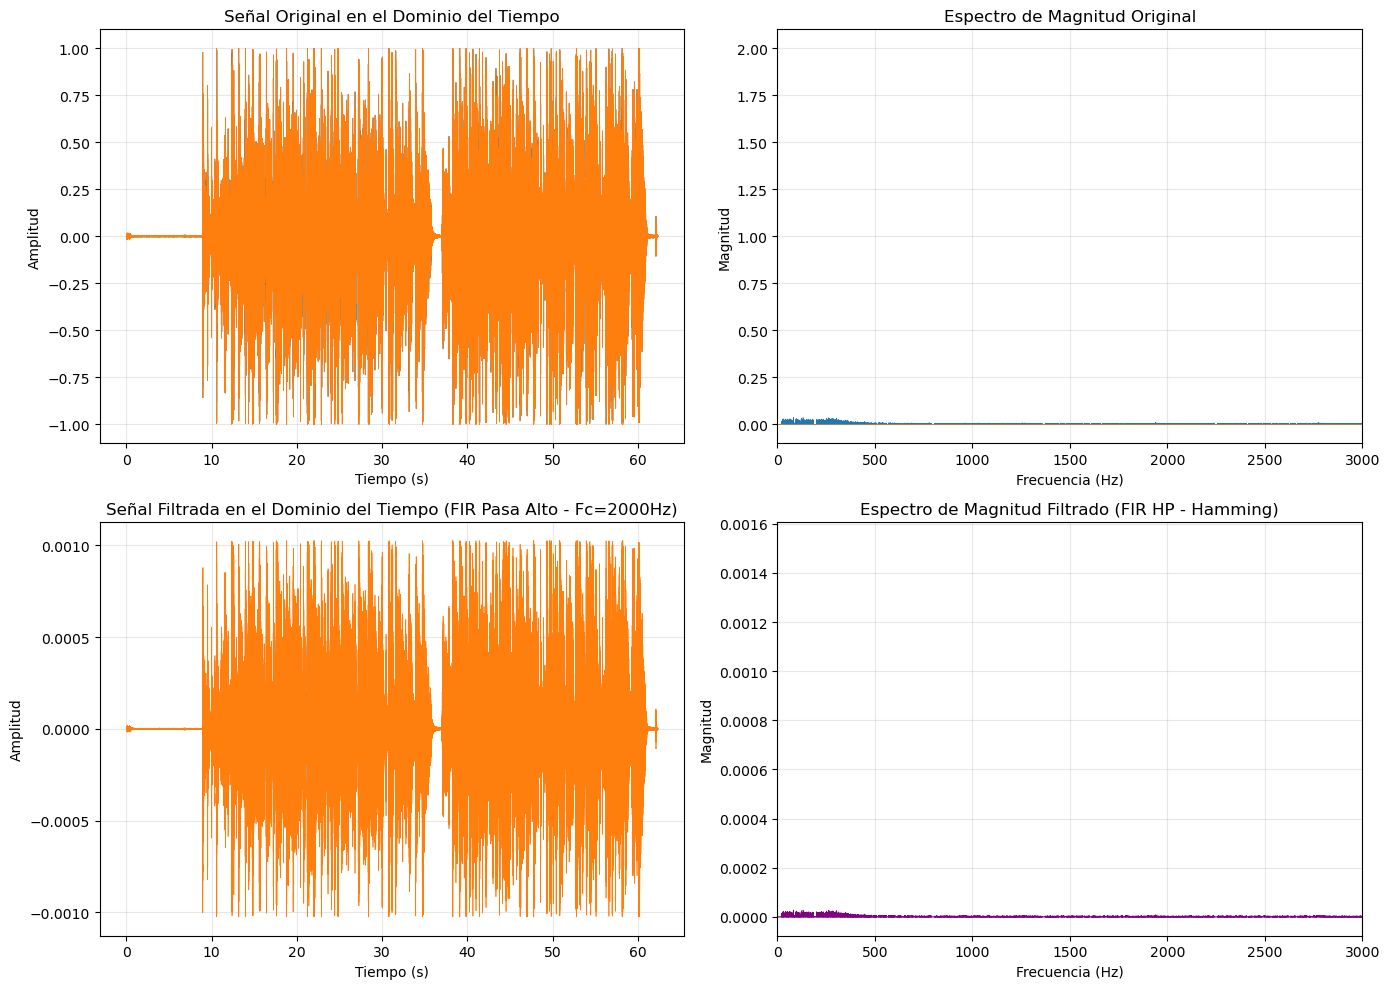

In [4]:
from scipy.signal import firwin, lfilter

filename = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/grabacion_1.wav'
Fs, data = waves.read(filename) # leer el archivo y encontrar sus frecuencias y componentes

if len(data.shape) > 1: # comprobar que hay datos
    Audio_m = data [:,0] # [componentes, canal]
else:
    Audio_m = data
 
data_norm = data /np.max(np.abs(data))
L = len(data_norm)
fft = np.fft.fft(data_norm)
frecuencias = np.fft.fftfreq(L,1/Fs)

def fir_highpass(fc, fs, ntaps=101):
    nyq = 0.5 * fs
    taps = firwin(ntaps, fc/nyq, pass_zero=False, window='hamming')
    return taps

# Corte para pasa-alto (ejemplo: 2000 Hz)
fc = 2000
taps = fir_highpass(fc, Fs)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# Escalar a 16 bits y guardar
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_hp_2000.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_fir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (FIR Pasa Alto - Fc=2000Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='purple')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (FIR HP - Hamming)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 2.2. FIR Pasa Bajo con ventana de Hamming

###### Filtro digital sin retroalimentación que deja pasar solo las frecuencias bajas y atenúa las altas, cuyos coeficientes se obtienen aplicando la ventana de Hamming para suavizar la transición y reducir ondulaciones en la respuesta en frecuencia

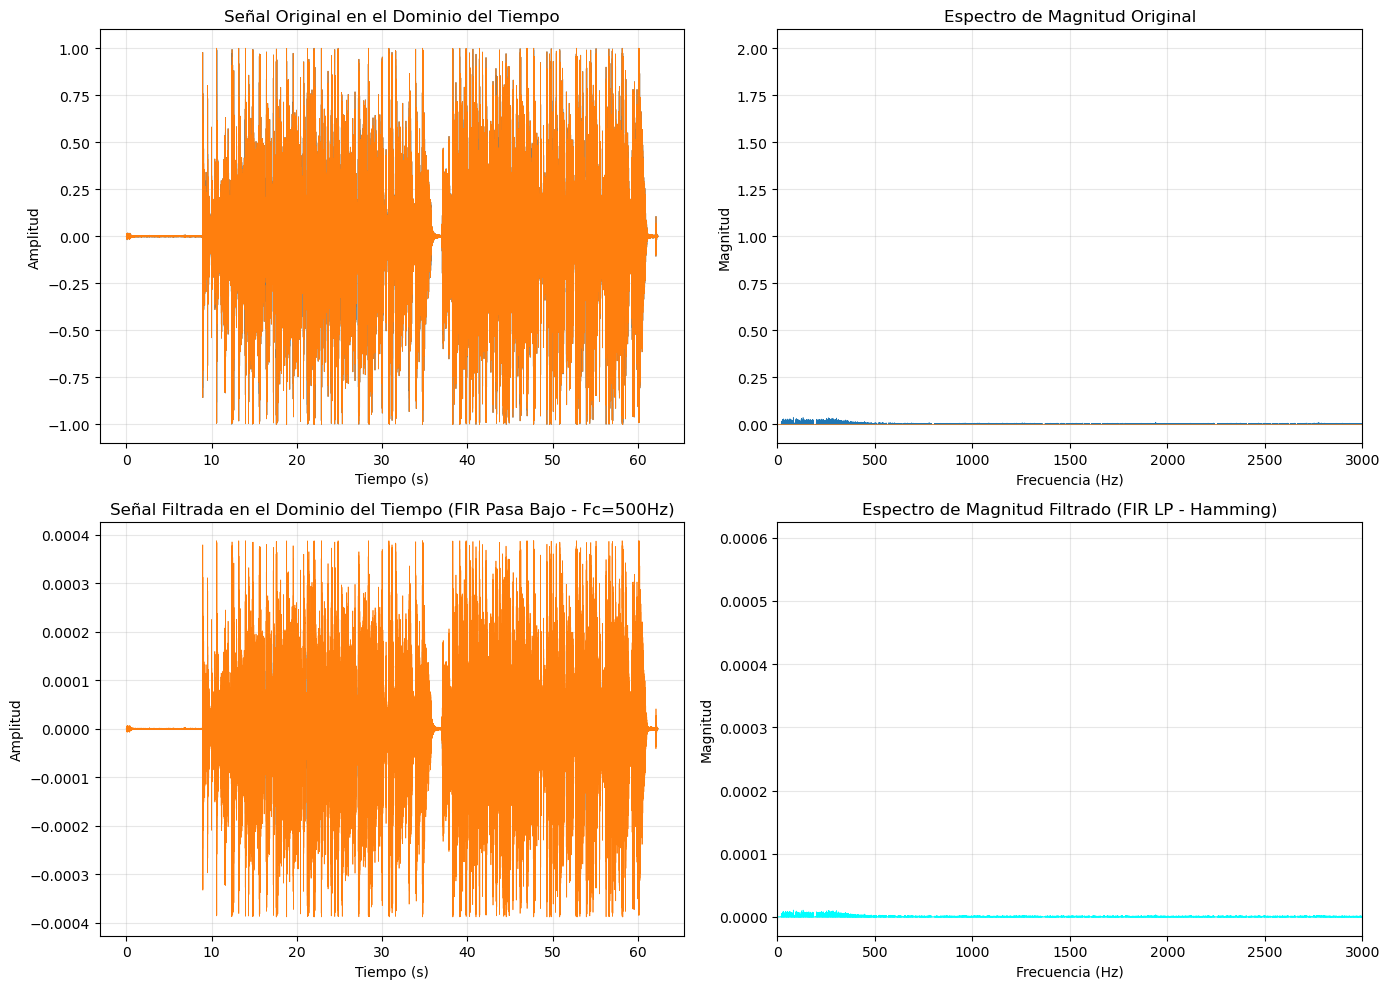

In [5]:
from scipy.signal import firwin, lfilter

def fir_lowpass (fc, fs,ntaps= 101):
    nyq = 0.5 * fs
    taps = firwin(ntaps,fc/nyq, pass_zero=False,window='hamming')
    return taps

fc = 500
taps = fir_lowpass (fc, Fs)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# escalar a 16 bits
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_lp_500.wav'
waves.write(ruta,Fs,audio_final)

# --- Visualización de Resultados ---
n = np.arange(0, L) / Fs
F = Fs * np.arange(0, L//2) / L

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Señal Original en el Dominio del Tiempo
axes[0, 0].plot(n, data_norm, linewidth=0.5)
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Amplitud')
axes[0, 0].set_title('Señal Original en el Dominio del Tiempo')
axes[0, 0].grid(True, alpha=0.3)

# 2. Espectro de Magnitud Original
M_fft_original = abs(fft)[0:L//2]
axes[0, 1].plot(F, M_fft_original, linewidth=0.5)
axes[0, 1].set_xlabel('Frecuencia (Hz)')
axes[0, 1].set_ylabel('Magnitud')
axes[0, 1].set_title('Espectro de Magnitud Original')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 3000])

# 3. Señal Filtrada en el Dominio del Tiempo
axes[1, 0].plot(n, audio_filtrado_fir, linewidth=0.5)
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Amplitud')
axes[1, 0].set_title('Señal Filtrada en el Dominio del Tiempo (FIR Pasa Bajo - Fc=500Hz)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Espectro de Magnitud Filtrado
M_fft_filtrado = abs(fft_filtrada)[0:L//2]
axes[1, 1].plot(F, M_fft_filtrado, linewidth=0.5, color='cyan')
axes[1, 1].set_xlabel('Frecuencia (Hz)')
axes[1, 1].set_ylabel('Magnitud')
axes[1, 1].set_title('Espectro de Magnitud Filtrado (FIR LP - Hamming)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 3000])

plt.tight_layout()
plt.show()

##### 2.3. FIR Pasa Banda con ventana de kaiser beta = 8.6

###### Filtro digital sin retroalimentación que deja pasar solo las frecuencias dentro de un rango específico y atenúa las que están por debajo y por encima, cuyos coeficientes se obtienen aplicando la ventana de Kaiser con parámetro beta = 8.6, lo que permite controlar la suavidad de la transición y el nivel de atenuación en las bandas no deseadas

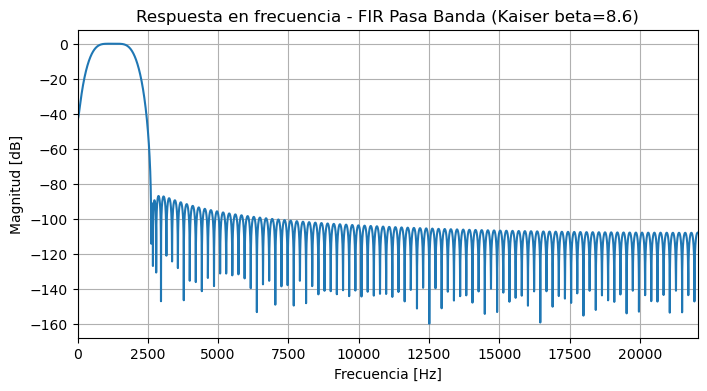

In [6]:
from scipy.signal import firwin, lfilter, freqz

def fir_bandpass_kaiser(fc1, fc2, fs, ntaps=101, beta=8.6):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [fc1/nyq, fc2/nyq], pass_zero=False, window=('kaiser', beta))
    return taps

# Parámetros del filtro
fc1 = 500.0
fc2 = 2000.0
ntaps = 201
taps = fir_bandpass_kaiser(fc1, fc2, Fs, ntaps=ntaps, beta=8.6)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# Escalar a 16 bits y guardar
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_bp_500_2000_kaiser8.6.wav'
waves.write(ruta, Fs, audio_final)

# Graficar respuesta en frecuencia del filtro
w, h = freqz(taps, worN=8000)
f = w * Fs / (2*np.pi)
plt.figure(figsize=(8,4))
plt.plot(f, 20*np.log10(np.abs(h)+1e-8))
plt.title('Respuesta en frecuencia - FIR Pasa Banda (Kaiser beta=8.6)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.xlim(0, Fs/2)
plt.grid(True)
plt.show()


##### 2.4. FIR Pasa Banda con ventana de blackman

###### Filtro digital sin retroalimentación que deja pasar solo un rango específico de frecuencias y atenúa las demás, cuyos coeficientes se obtienen aplicando la ventana de Blackman, la cual proporciona una transición muy suave y una alta atenuación fuera de la banda

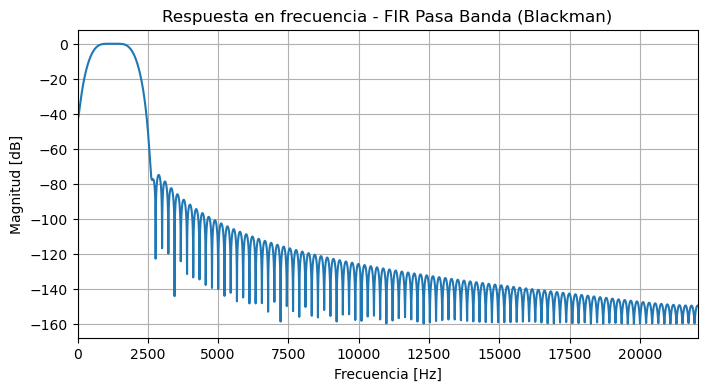

In [7]:
from scipy.signal import firwin, lfilter, freqz

def fir_bandpass_blackman(fc1, fc2, fs, ntaps=101):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [fc1/nyq, fc2/nyq], pass_zero=False, window='blackman')
    return taps

# Parámetros del filtro
fc1 = 500.0
fc2 = 2000.0
ntaps = 201
taps = fir_bandpass_blackman(fc1, fc2, Fs, ntaps=ntaps)
audio_filtrado_fir = lfilter(taps, 1.0, data_norm)

fft_filtrada = np.fft.fft(audio_filtrado_fir)
# Escalar a 16 bits y guardar
audio_final = (audio_filtrado_fir*32767).astype(np.int16)
ruta = 'C:/Users/Usuario/Documents/UIDE/Procesamiento de imagenes y señales/Semana 2/fir_bp_500_2000_blackman.wav'
waves.write(ruta, Fs, audio_final)

# Graficar respuesta en frecuencia del filtro
w, h = freqz(taps, worN=8000)
f = w * Fs / (2*np.pi)
plt.figure(figsize=(8,4))
plt.plot(f, 20*np.log10(np.abs(h)+1e-8))
plt.title('Respuesta en frecuencia - FIR Pasa Banda (Blackman)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.xlim(0, Fs/2)
plt.grid(True)
plt.show()


##### Consulte alguna métrica que le permita tomar la decisión

###### La Atenuación en la Banda de Rechazo indica cuánto reduce el filtro las frecuencias que no se desean conservar, es decir, aquellas que están fuera de la banda pasante. Cuanta mayor sea esta atenuación, mayor será la capacidad del filtro para eliminar ruido. La atenuación en la banda de rechazo proporciona un indicador directo de la “limpieza” del resultado filtrado. Si un filtro ofrece una atenuación mayor, entonces generalmente se considera superior, siempre que cumpla también los requisitos de estabilidad y forma de la banda pasante.
###### La siguiente métrica es Ripple en Banda Pasante que ayuda a decidir qué filtro es mejor porque está directamente relacionada con la fidelidad del filtrado. Si el ripple es alto, la señal que pasa por el filtro sufrirá alteraciones en su amplitud incluso en las frecuencias que se supone que deben mantenerse intactas, lo que provoca pérdidas de información o distorsiones. Por eso, cuando la prioridad es conservar la forma original de la señal, se escoge un filtro con el menor ripple posible.